# Linear Regression
Linear regression is a statistical method that models a relationship between s dependent variables and one or more independant variables

**One independant variable**

`y = mx + c` where `y` can be house prices and `x` can be house size

**Multiple independant variables**

`y = w1x1 + w2x2 .... + w6x6 + b` where `y` is the house prices, `x1, x2..` are features like house size, number of bedrooms and distance to city center, and `w1,w2...` are weights which determine the influence of each feature and `b` is the bias, which adjusts the baseline prediction (shifts up or down without changing slope)

## Cost Function (MSE - cost function)
Minimise MSE to get the best weight and bias

$$
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

Where,

$ N $ is the number of data points,

$ y_i $ is the actual value we are trying to predict,i.e, the target variable,

$ hat{y}_i $ is the predicted value from the regression equation

MSE measures how far the predictions are from actual values. A smaller MSE means a better fit.

### Side Note
New terms I learnt were loss function, cost function, and objective function
* **Loss function** is defined on data point, prediction and label and measures the penalty (Squared loss, hinge loss, 0/1 loss)

* **Cost function** is a bit more general, it is a sum of loss functions over your training set plus some model complexity penalty (regularization) (MSE, SVM cost function)

* **Objective function** is the most general term for any function that is optimized during training


## Gradient Descent Optimation (MSE reductions)
This is an iterative algo that updates weight to minimize loss

$$
w_j = w_j - {\alpha} \frac{\partial MSE}{\partial w_j}
$$

and for bias,

$$
b = b - {\alpha} \frac{\partial MSE}{\partial b}
$$

where $ {\alpha} $ is the learning rate, and the partial function is the gradient of the cost function.

Gradient descent moves downhill in the cost function to find the optimal weight and bias (local minimum)

## Calculating the Gradient partial

For biases,

$$
\frac{\partial MSE}{\partial b} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)
$$

For weights,

$$
\frac{\partial MSE}{\partial w_j} = \frac{-2}{N} \sum_{i=1}^{N} x_i (y_i - \hat{y}_i)
$$

Here $\hat{y}_i$ is equal to ${x_i}{W} + {b}$


## Implementation

Possible functions include, cost_function(), compute_gradients() (the partial derivative), grad_desc() and a predict() for fitting

In [32]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [77]:
X1, y1 = datasets.make_regression(n_samples=100, n_features=1, noise=15, random_state=2)

In [76]:
#Generate random data
X_data, y_points = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=2)

In [96]:
# print(X_data)
print(y_points)


[ -39.28111368   60.36088967   75.52329534   44.96973636   67.66126148
  -72.56783539   19.01828591  -22.48725552 -142.24576438  -15.18039423
   30.97837048   96.49616637  -32.18524905   -2.73343352   51.91525767
    3.15477977   59.67514565  -39.18356672   77.51342439    2.12711018
   46.68645147  -19.761177    -48.75839881  -64.53825927   28.77572075
  -64.91364323   19.42416802   27.95857927   47.08740928  -84.85367831
   -5.27930487    1.63049652  -49.65719062  115.44179673  -15.90690036
   84.79331953  -75.6361891     9.44506047   -1.10256915   75.29608508
 -123.12209367   -9.2643982   -89.78307298    6.92428027   -1.37114106
  -25.12536695   86.08123884  -30.90683686  -25.0568712    57.12871401
  -59.45098934  -31.08914872  -19.63623245   35.24070197 -105.60242742
  105.79285848   33.5416947    61.17460846  -55.74511813  -20.22825731
   22.61124007  -98.27810976    2.51352804  -48.6592866    -0.80311042
    7.54015095   82.78973256  -40.39608706 -167.01636233  -16.85774471
   38.

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=100, batch_size=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.weights = None
        self.biases = None

    def cost_function(self,y, y_pred):
        return np.mean((y - y_pred) **2) # for a single data point, will be used in a loop to iterate over all points
    
    def compute_grad(self, X, y, y_pred):
        error = y - y_pred

        db = -2 * np.mean(error) # np.mean handles over N samples, can substitute with len(X)
        dW = -2 * np.mean(X.T.dot(error)) # Transpose X to fit vector of error

        return db, dW
        
    def grad_desc(self, X, y):
        cost_func = []
        self.weights = np.zeros(X.shape[1])  # If X has shape (N, d), initialize weights as a vector of size d which is features
        self.biases = 0  
        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.biases # get y_pred first
            cost = self.cost_function(y, y_pred)
            cost_func.append(cost)
            dB, dW = self.compute_grad(X, y, y_pred)
            self.weights = self.weights - self.learning_rate * dW
            self.biases = self.biases - self.learning_rate * dB
            if epoch % 2 == 0:
                print(f"Epoch {epoch}/{self.epochs}, Cost: {cost}")
        return self.weights, self.biases, cost_func

    def predict(self, X):
        return np.dot(X,self.weights) + self.biases

In [94]:
model = LinearRegression(learning_rate=0.05, epochs=100, batch_size=10)
weights,biases, cost_func = model.grad_desc(X_data, y_points)

Epoch 0/100, Cost: 4011.9182645632814
Epoch 2/100, Cost: 34659654.31778082
Epoch 4/100, Cost: 327993810146.6009
Epoch 6/100, Cost: 3103926616733905.5
Epoch 8/100, Cost: 2.937360448363235e+19
Epoch 10/100, Cost: 2.7797327285683415e+23
Epoch 12/100, Cost: 2.6305637929385236e+27
Epoch 14/100, Cost: 2.4893997173185362e+31
Epoch 16/100, Cost: 2.3558109365076466e+35
Epoch 18/100, Cost: 2.229390937083847e+39
Epoch 20/100, Cost: 2.1097550203751072e+43
Epoch 22/100, Cost: 1.9965391318133657e+47
Epoch 24/100, Cost: 1.889398753108948e+51
Epoch 26/100, Cost: 1.788007853874286e+55
Epoch 28/100, Cost: 1.6920578995067134e+59
Epoch 30/100, Cost: 1.6012569123112868e+63
Epoch 32/100, Cost: 1.5153285830066257e+67
Epoch 34/100, Cost: 1.4340114299100563e+71
Epoch 36/100, Cost: 1.3570580032434413e+75
Epoch 38/100, Cost: 1.2842341321383926e+79
Epoch 40/100, Cost: 1.2153182120494749e+83
Epoch 42/100, Cost: 1.150100530406995e+87
Epoch 44/100, Cost: 1.088382628457314e+91
Epoch 46/100, Cost: 1.0299766973487586e+

In [95]:
predictions = model.predict(X_data)
print(predictions)

[-1.46229774e+101]
[ 1.28546464e+101 -1.98678007e+101 -2.39715484e+101 -7.91671486e+100
 -1.20455189e+101  8.73172437e+100  8.36883095e+099  1.94913704e+100
  3.56176458e+101  5.92020208e+100 -5.56992676e+100 -1.99789582e+101
  1.09501945e+101  5.59300145e+100 -1.23051246e+101  1.14326135e+100
 -6.32491249e+100  3.18925868e+100 -2.14477278e+101 -1.63430258e+100
 -2.53009797e+101  4.92269669e+100  1.60809294e+101  1.23229473e+101
 -8.26653844e+100  1.54845059e+101 -1.01506237e+101 -7.86854309e+100
 -7.32455205e+100  2.10629789e+101  2.78469933e+100  1.10307883e+100
  2.62394626e+101 -3.26151316e+101 -5.93335054e+099 -1.71464300e+101
  2.02598797e+101 -3.14616493e+100  1.35140419e+100 -1.86796161e+101
  3.12516418e+101  3.46780830e+100  2.71925415e+101 -4.75304629e+100
  1.39518092e+098  5.50750004e+100 -1.52058506e+101  4.96868051e+100
  9.92372921e+100 -1.77950196e+101  1.82239141e+101  1.21385212e+101
  6.14575000e+100 -5.54953847e+100  2.73311420e+101 -2.31558239e+101
 -8.92552786e+1

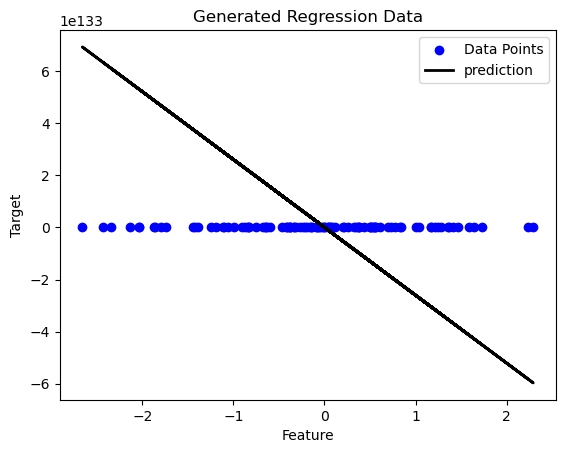

In [93]:
plt.scatter(X_data, y_points, color='blue', label='Data Points')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Generated Regression Data')
plt.plot(X_data, predictions, linewidth=2,color='black', label='prediction')
plt.legend()
plt.show()